In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.interpolate
import seaborn as sns

In [54]:
set_list = ["cs3MRL","cs5MRL","lin5MRL", "poly5MRL", "uniform", "cs5MRL_198"]

n0_set_list = ["cs5MRL_n0", "cs5MRL_n0_uniform"]

#,"cs5MRL_n0_uniform", "lin8MRL_n0"

In [37]:
def get_r1p4(MRL_table):
    max_index = np.argmax(MRL_table[:,0])
    clipped_MRL = MRL_table[:max_index-1,:]
        
    diffMRL = np.ediff1d(clipped_MRL[:,0])
    drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
    above_m = np.argmax(clipped_MRL[:,0]>clipped_MRL[drop_in_m,0])
    
    keep = np.zeros(clipped_MRL[:,0].shape[0], dtype=bool)
    for i in range(clipped_MRL[:,0].shape[0]):
        keep[i] = i < drop_in_m or i > above_m
        
    fixed_MRL = clipped_MRL[keep,:]
    r_func = scipy.interpolate.CubicSpline(fixed_MRL[:,0], fixed_MRL[:,1])
    r1p4 = r_func(1.4)
    
    return r1p4

def sorted_r1p4(datapath, MRLdir_name):
    numlist = []
    num_mrl = 0

    for file in os.listdir(datapath+MRLdir_name):
            if '.dat' in file:
                numlist.append(int(file[:-4]))
                num_mrl += 1
    
    r1p4 = np.zeros((num_mrl,2))

    for i in range(num_mrl):
        file = datapath+MRLdir_name+'/'+str(i)+'.dat'
        MRL = np.loadtxt(file)

        r1p4[i,0] = get_r1p4(MRL)
        r1p4[i,1] = i

    sorted_index = np.argsort(r1p4[:,0])
    r1p4_sort = r1p4[sorted_index,:]
    
    return r1p4_sort

def maxM_array(datapath, MRLdir_name):
    numlist = []
    num_mrl = 0

    for file in os.listdir(datapath+MRLdir_name):
            if '.dat' in file:
                numlist.append(int(file[:-4]))
                num_mrl += 1
    
    maxM = np.zeros(num_mrl)

    for i in range(num_mrl):
        file = datapath+MRLdir_name+'/'+str(i)+'.dat'
        MRL = np.loadtxt(file)

        maxM[i] = np.max(MRL[:,0])
    
    return maxM

def get_Lamb1p4(MRL_table):
    max_index = np.argmax(MRL_table[:,0])
    clipped_MRL = MRL_table[:max_index-1,:]
        
    diffMRL = np.ediff1d(clipped_MRL[:,0])
    drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
    above_m = np.argmax(clipped_MRL[:,0]>clipped_MRL[drop_in_m,0])
    
    keep = np.zeros(clipped_MRL[:,0].shape[0], dtype=bool)
    for i in range(clipped_MRL[:,0].shape[0]):
        keep[i] = i < drop_in_m or i > above_m
        
    fixed_MRL = clipped_MRL[keep,:]
    lamb_func = scipy.interpolate.CubicSpline(fixed_MRL[:,0], fixed_MRL[:,2])
    Lamb1p4 = lamb_func(1.4)
    
    return Lamb1p4

def Lamb1p4_array(datapath, MRLdir_name):
    numlist = []
    num_mrl = 0

    for file in os.listdir(datapath+MRLdir_name):
            if '.dat' in file:
                numlist.append(int(file[:-4]))
                num_mrl += 1
    
    Lamb1p4 = np.zeros(num_mrl)

    for i in range(num_mrl):
        file = datapath+MRLdir_name+'/'+str(i)+'.dat'
        MRL = np.loadtxt(file)

        Lamb1p4[i] = get_Lamb1p4(MRL)
    
    return Lamb1p4

In [24]:
datapath = "/Users/brendanking/Documents/LANL/eos_data/"

n0data_list = []
#save data
for MRLdir_name in n0_set_list:

    r1p4_sort = sorted_r1p4(datapath, MRLdir_name)
    np.savetxt("../../eos_data/r1p4_"+MRLdir_name+".dat", r1p4_sort)
    maxM = maxM_array(datapath, MRLdir_name)
    np.savetxt("../../eos_data/maxM_"+MRLdir_name+".dat", maxM)
    Lamb1p4 = Lamb1p4_array(datapath, MRLdir_name)
    np.savetxt("../../eos_data/lamb1p4_"+MRLdir_name+".dat", Lamb1p4)
    
    n0data_list.append([r1p4_sort, maxM, Lamb1p4, MRLdir_name])
    
cs_eq1MRL_n0 = np.loadtxt(datapath+"cs_eq1MRL_n0")
cs_eq1_r1p4_n0 = get_r1p4(cs_eq1MRL_n0)
cs_eq1_max_n0 = np.max(cs_eq1MRL_n0[:,0])
cs_eq1_Lamb1p4_n0 = get_Lamb1p4(cs_eq1MRL_n0)

In [39]:
#save data
data_list = []
for MRLdir_name in set_list:
    
    r1p4_sort = sorted_r1p4(datapath, MRLdir_name)
    np.savetxt("../../eos_data/r1p4_"+MRLdir_name+".dat", r1p4_sort)
    maxM = maxM_array(datapath, MRLdir_name)
    np.savetxt("../../eos_data/maxM_"+MRLdir_name+".dat", maxM)
    Lamb1p4 = Lamb1p4_array(datapath, MRLdir_name)
    np.savetxt("../../eos_data/lamb1p4_"+MRLdir_name+".dat", Lamb1p4)
    
    data_list.append([r1p4_sort, maxM, Lamb1p4, MRLdir_name])
    
cs_eq1MRL = np.loadtxt(datapath+"cs_eq1MRL")
cs_eq1_r1p4 = get_r1p4(cs_eq1MRL)
cs_eq1_max = np.max(cs_eq1MRL[:,0])
cs_eq1_r=Lamb1p4 = get_Lamb1p4(cs_eq1MRL)

In [55]:
#load data in from file
datapath = "/Users/brendanking/Documents/LANL/eos_data/"

n0data_list = []
for MRLdir_name in n0_set_list:

    r1p4_sort = np.loadtxt("../../eos_data/r1p4_"+MRLdir_name+".dat")
    maxM = np.loadtxt("../../eos_data/maxM_"+MRLdir_name+".dat")
    Lamb1p4 = np.loadtxt("../../eos_data/lamb1p4_"+MRLdir_name+".dat")
    
    n0data_list.append([r1p4_sort, maxM, Lamb1p4, MRLdir_name])

cs_eq1MRL_n0 = np.loadtxt(datapath+"cs_eq1MRL_n0")
cs_eq1_r1p4_n0 = get_r1p4(cs_eq1MRL_n0)
cs_eq1_max_n0 = np.max(cs_eq1MRL_n0[:,0])
cs_eq1_Lamb1p4_n0 = get_Lamb1p4(cs_eq1MRL_n0)

data_list = []
for MRLdir_name in set_list:

    r1p4_sort = np.loadtxt("../../eos_data/r1p4_"+MRLdir_name+".dat")
    maxM = np.loadtxt("../../eos_data/maxM_"+MRLdir_name+".dat")
    Lamb1p4 = np.loadtxt("../../eos_data/lamb1p4_"+MRLdir_name+".dat")
    
    data_list.append([r1p4_sort, maxM, Lamb1p4, MRLdir_name])
    
cs_eq1MRL = np.loadtxt(datapath+"cs_eq1MRL")
cs_eq1_r1p4 = get_r1p4(cs_eq1MRL)
cs_eq1_max = np.max(cs_eq1MRL[:,0])
cs_eq1_r=Lamb1p4 = get_Lamb1p4(cs_eq1MRL)

In [56]:
n0median_list = []
n0mean_list = []
for MRLdir_name in n0_set_list:
    
    r1p4_sort = np.loadtxt("../../eos_data/r1p4_"+MRLdir_name+".dat")
    median_r1p4 = np.median(r1p4_sort,axis=0)
    mean_r1p4 = np.mean(r1p4_sort,axis=0)
    
    n0median_list.append(median_r1p4)
    n0mean_list.append(mean_r1p4)

median_list = []
mean_list = []
for MRLdir_name in set_list:
    
    r1p4_sort = np.loadtxt("../../eos_data/r1p4_"+MRLdir_name+".dat")
    median_r1p4 = np.median(r1p4_sort,axis=0)
    mean_r1p4 = np.mean(r1p4_sort,axis=0)
    
    median_list.append(median_r1p4)
    mean_list.append(mean_r1p4)
    
print(n0median_list, median_list)
print(mean_list, n0mean_list)

[array([  13.12781632, 3318.        ]), array([  12.51069637, 1014.5       ])] [array([  11.59342714, 4876.        ]), array([  11.68649299, 7353.        ]), array([ 12.04716942, 999.5       ]), array([  11.26481329, 1443.5       ]), array([  11.1087863, 1014.5      ]), array([  11.78512801, 5217.        ])]
[array([  11.59311218, 4876.        ]), array([  11.64147748, 7353.        ]), array([ 12.04876498, 999.5       ]), array([  11.2112535, 1443.5      ]), array([  11.12079098, 1014.5       ]), array([  11.76891947, 5217.        ])] [array([  12.99639754, 3318.        ]), array([  12.45040816, 1014.5       ])]


In [57]:
for i, MRLdir_name in enumerate(set_list):
    print("The median $R_{1.4}$ value for " + MRLdir_name + " is {} km".format(median_list[i][0]))

The median $R_{1.4}$ value for cs3MRL is 11.593427143782298 km
The median $R_{1.4}$ value for cs5MRL is 11.686492993576156 km
The median $R_{1.4}$ value for lin5MRL is 12.047169418638285 km
The median $R_{1.4}$ value for poly5MRL is 11.264813290171528 km
The median $R_{1.4}$ value for uniform is 11.108786296478849 km
The median $R_{1.4}$ value for cs5MRL_198 is 11.785128010439392 km


In [60]:
for i, MRLdir_name in enumerate(set_list):
    print("The mean $R_{1.4}$ value for " + MRLdir_name + " is {} km".format(mean_list[i][0]))

The mean $R_{1.4}$ value for cs3MRL is 11.593112181060757 km
The mean $R_{1.4}$ value for cs5MRL is 11.641477476233483 km
The mean $R_{1.4}$ value for lin5MRL is 12.048764984665532 km
The mean $R_{1.4}$ value for poly5MRL is 11.211253503096007 km
The mean $R_{1.4}$ value for uniform is 11.120790980754618 km
The mean $R_{1.4}$ value for cs5MRL_198 is 11.768919471362718 km


In [59]:
for i, MRLdir_name in enumerate(n0_set_list):
    print("The median $R_{1.4}$ value for " + MRLdir_name + " is {} km".format(n0median_list[i][0]))

The median $R_{1.4}$ value for cs5MRL_n0 is 13.127816319205804 km
The median $R_{1.4}$ value for cs5MRL_n0_uniform is 12.510696366002326 km


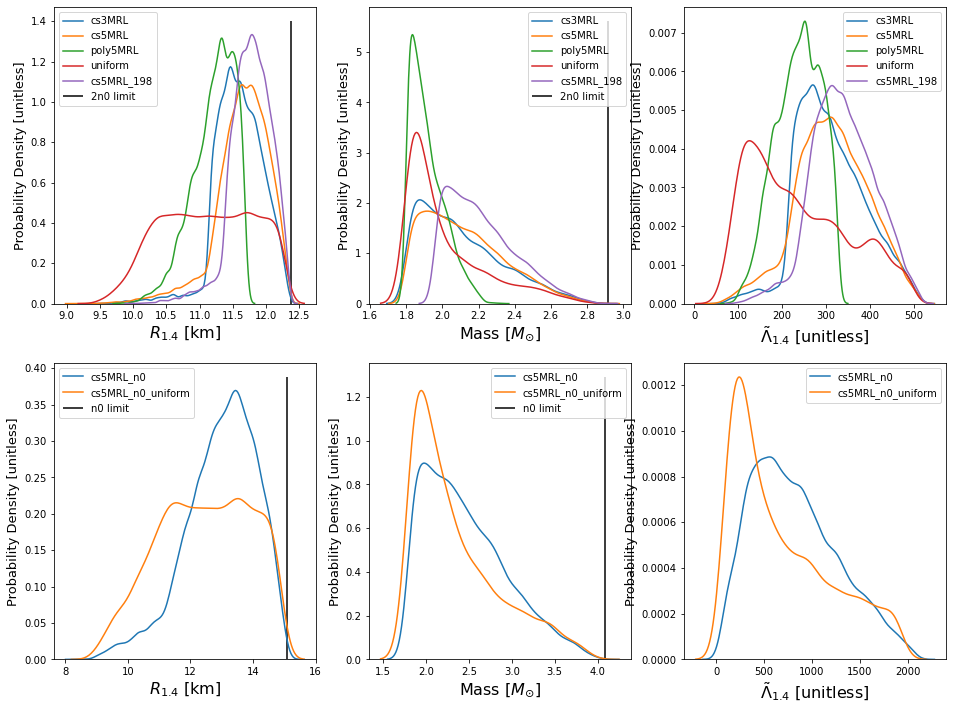

In [45]:
fig, ax = plt.subplots(2,3, figsize=(16,12))

for item in data_list:
    sns.kdeplot(data=item[0][:,0], label=item[3], ax=ax[0,0], bw_adjust=0.7)
    sns.kdeplot(data=item[2], label=item[3], ax=ax[0,2], bw_adjust=0.7)
    sns.kdeplot(data=item[1], label=item[3], ax=ax[0,1])
    
cs_eq1MRL = np.loadtxt(datapath+"cs_eq1MRL")
cs_eq1_r1p4 = get_r1p4(cs_eq1MRL)
cs_eq1_max = np.max(cs_eq1MRL[:,0])
ax[0,0].vlines(cs_eq1_r1p4, ymin=ax[0,0].get_ylim()[0], ymax=ax[0,0].get_ylim()[1],
               color='black', label="2n0 limit")
ax[0,1].vlines(cs_eq1_max, ymin=ax[0,1].get_ylim()[0], ymax=ax[0,1].get_ylim()[1],
               color='black', label="2n0 limit")

ax[0,0].set_xlabel(r"$R_{1.4}$ [km]", fontsize=16)
ax[0,0].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[0,0].legend()

ax[0,1].set_xlabel(r"Mass [$M_{\odot}$]", fontsize=16)
ax[0,1].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[0,1].legend()

ax[0,2].set_xlabel(r"$\tilde \Lambda_{1.4}$ [unitless]", fontsize=16)
ax[0,2].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[0,2].legend()

for item in n0data_list:
    sns.kdeplot(data=item[0][:,0], label=item[3], ax=ax[1,0], bw_adjust=0.8)
    sns.kdeplot(data=item[2], label=item[3], ax=ax[1,2], bw_adjust=0.8)
    sns.kdeplot(data=item[1], label=item[3], ax=ax[1,1])
    
ax[1,0].vlines(cs_eq1_r1p4_n0, ymin=ax[1,0].get_ylim()[0], ymax=ax[1,0].get_ylim()[1],
               color='black', label="n0 limit")
ax[1,1].vlines(cs_eq1_max_n0, ymin=ax[1,1].get_ylim()[0], ymax=ax[1,1].get_ylim()[1],
               color='black', label="n0 limit")

ax[1,0].set_xlabel(r"$R_{1.4}$ [km]", fontsize=16)
ax[1,0].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[1,0].legend()

ax[1,1].set_xlabel(r"Mass [$M_{\odot}$]", fontsize=16)
ax[1,1].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[1,1].legend()

ax[1,2].set_xlabel(r"$\tilde \Lambda_{1.4}$ [unitless]", fontsize=16)
ax[1,2].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[1,2].legend()

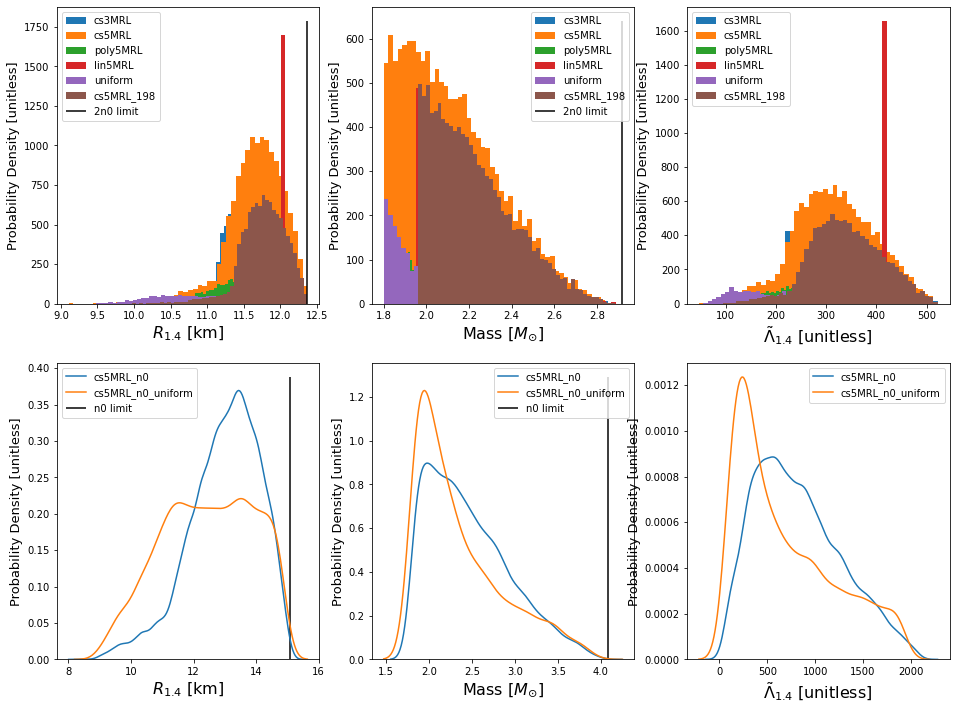

In [42]:
fig, ax = plt.subplots(2,3, figsize=(16,12))

n_bins=50

for item in data_list:
    ax[0,0].hist(item[0][:,0], bins=n_bins, label=item[3])
    ax[0,2].hist(item[2], bins=n_bins, label=item[3])
    ax[0,1].hist(item[1], bins=n_bins, label=item[3])
    
cs_eq1MRL = np.loadtxt(datapath+"cs_eq1MRL")
cs_eq1_r1p4 = get_r1p4(cs_eq1MRL)
cs_eq1_max = np.max(cs_eq1MRL[:,0])
ax[0,0].vlines(cs_eq1_r1p4, ymin=ax[0,0].get_ylim()[0], ymax=ax[0,0].get_ylim()[1],
               color='black', label="2n0 limit")
ax[0,1].vlines(cs_eq1_max, ymin=ax[0,1].get_ylim()[0], ymax=ax[0,1].get_ylim()[1],
               color='black', label="2n0 limit")

ax[0,0].set_xlabel(r"$R_{1.4}$ [km]", fontsize=16)
ax[0,0].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[0,0].legend()

ax[0,1].set_xlabel(r"Mass [$M_{\odot}$]", fontsize=16)
ax[0,1].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[0,1].legend()

ax[0,2].set_xlabel(r"$\tilde \Lambda_{1.4}$ [unitless]", fontsize=16)
ax[0,2].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[0,2].legend()

for item in n0data_list:
    sns.kdeplot(data=item[0][:,0], label=item[3], ax=ax[1,0], bw_adjust=0.8)
    sns.kdeplot(data=item[2], label=item[3], ax=ax[1,2], bw_adjust=0.8)
    sns.kdeplot(data=item[1], label=item[3], ax=ax[1,1])
    
ax[1,0].vlines(cs_eq1_r1p4_n0, ymin=ax[1,0].get_ylim()[0], ymax=ax[1,0].get_ylim()[1],
               color='black', label="n0 limit")
ax[1,1].vlines(cs_eq1_max_n0, ymin=ax[1,1].get_ylim()[0], ymax=ax[1,1].get_ylim()[1],
               color='black', label="n0 limit")

ax[1,0].set_xlabel(r"$R_{1.4}$ [km]", fontsize=16)
ax[1,0].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[1,0].legend()

ax[1,1].set_xlabel(r"Mass [$M_{\odot}$]", fontsize=16)
ax[1,1].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[1,1].legend()

ax[1,2].set_xlabel(r"$\tilde \Lambda_{1.4}$ [unitless]", fontsize=16)
ax[1,2].set_ylabel(r"Probability Density [unitless]", fontsize=13)
ax[1,2].legend()

In [ ]:
datapath = "/Users/brendanking/Documents/LANL/LANL_Project_eos/"
MRLdir_name = "uniform/"

r1p4_sort = sorted_r1p4(datapath, MRLdir_name)
maxM = maxM_array(datapath, MRLdir_name)
Lamb1p4 = Lamb1p4_array(datapath, MRLdir_name)